## Car Acceptability: Classification

Dataset Source: https://www.kaggle.com/datasets/subhajeetdas/car-acceptability-classification-dataset

#### Install Auto-Sklearn

In [1]:
%pip install -U matplotlib
%pip install -U numpy
%pip install auto-sklearn seaborn sklearn imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Import Necessary Libraries

In [2]:
import os, sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import autosklearn
from autosklearn.classification import AutoSklearnClassifier as ASC

import imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

#### Show Library Versions

In [3]:
n = 18

print(f"Language/Library".rjust(n-2), '|', 'Version')
print('-' * (n-2), '|', '--------')
print("Python :".rjust(n), sys.version[0:6])
print("NumPy :".rjust(n), np.__version__)
print("Pandas :".rjust(n), pd.__version__)
print("Sklearn :".rjust(n), sklearn.__version__)
print("Imblearn :".rjust(n), imblearn.__version__)
print("Seaborn :".rjust(n), sns.__version__)
print("Auto-Sklearn :".rjust(n), autosklearn.__version__)

Language/Library | Version
---------------- | --------
          Python : 3.10.1
           NumPy : 1.24.3
          Pandas : 1.5.3
         Sklearn : 0.24.2
        Imblearn : 0.8.1
         Seaborn : 0.12.2
    Auto-Sklearn : 0.15.0


#### Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Initial Data Preprocessing

#### Ingest Dataset

In [5]:
col_names = ["purchase_price",
             "maintenance_price",
             "num_of_doors",
             "seating_capacity",
             "luggage_space",
             "safety",
             "label"
             ]

dtypes = {"purchase_price": str,
          "maintenance_price": str,
          "num_of_doors": str,
          "seating_capacity": str,
          "luggage_space": str,
          "safety": str,
          "label": str
              }

data = pd.read_csv("/content/drive/MyDrive/Projects with Structured Data/car.csv",
                   names=col_names,
                   dtype=dtypes,
                   engine='c',
                   header=0)

data.head()

,purchase_price,maintenance_price,num_of_doors,seating_capacity,luggage_space,safety,label
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#### More Dataset Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   purchase_price     1728 non-null   object
 1   maintenance_price  1728 non-null   object
 2   num_of_doors       1728 non-null   object
 3   seating_capacity   1728 non-null   object
 4   luggage_space      1728 non-null   object
 5   safety             1728 non-null   object
 6   label              1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Visualizations

#### Create Function to Visualize Features (Barplot)

In [7]:
def barplot_visual(feature_to_visualize: pd.Series,
                   plot_title: str,
                   x_label: str,
                   y_label: str = "# of Samples",
                   ):
    """
    This function returns a histogram for a feature.

    Inputs:
    - feature_to_visualize: Feature to plot in the form
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - y_label: The string label value for the y label.

    Output:
    - A Bar Plot.
    """

    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."

    ax = feature_to_visualize.value_counts().plot.bar(
                                                      figsize=(12,8),
                                                      rot=0,
                                                      legend=False,
                                                      color=["lightgreen",
                                                             "blue",
                                                             "brown",
                                                             "lightblue",
                                                             "tan",
                                                             "yellow",
                                                             "orange",
                                                             "green",
                                                             "red",
                                                             "purple"]
                                                      )

    ax.bar_label(ax.containers[0])

    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()

#### Dataset Visualization: Purchase Price

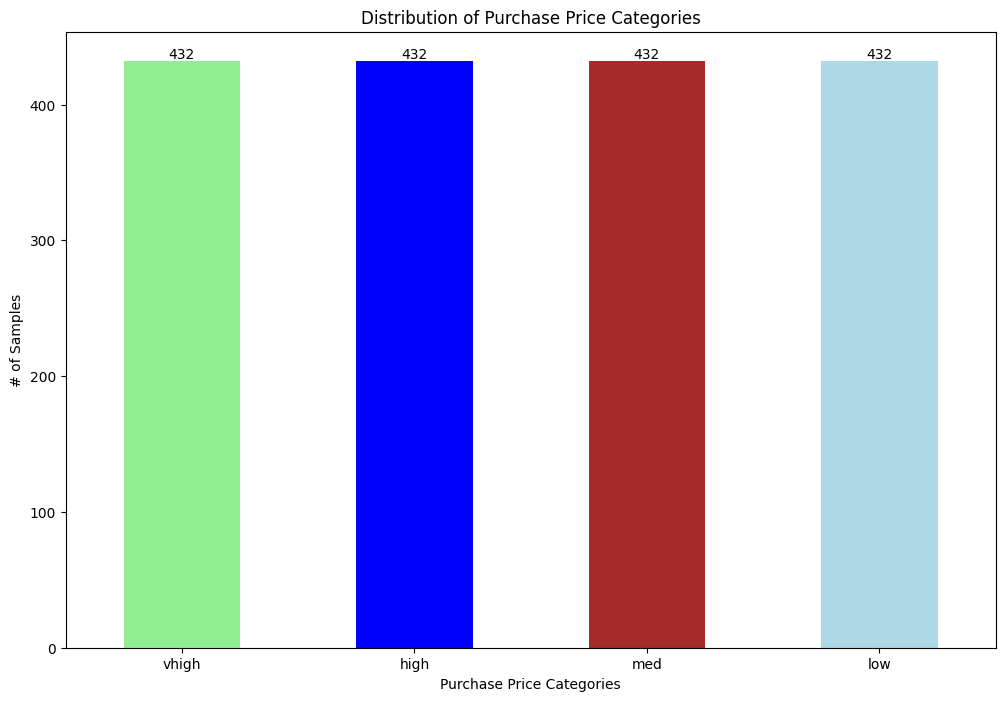

In [8]:
barplot_visual(data["purchase_price"],
               "Distribution of Purchase Price Categories",
               "Purchase Price Categories",
               "# of Samples",
               )

#### Dataset Visualization: Maintenance Price

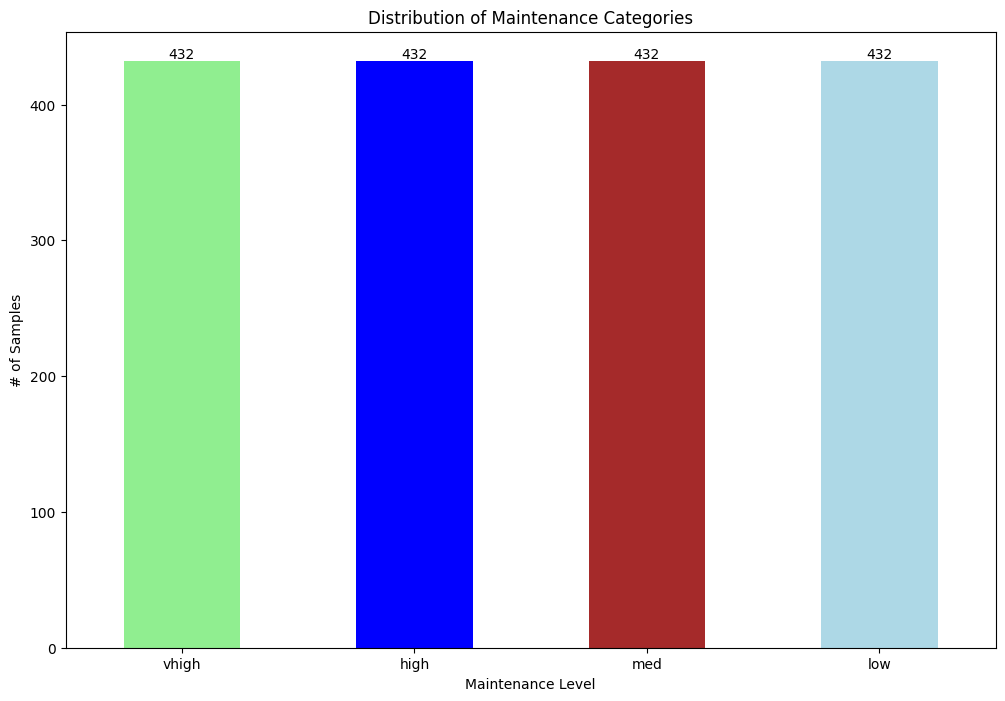

In [9]:
barplot_visual(data["maintenance_price"],
               "Distribution of Maintenance Categories",
               "Maintenance Level",
               "# of Samples",
               )

#### Dataset Visualization: Number of Car Doors

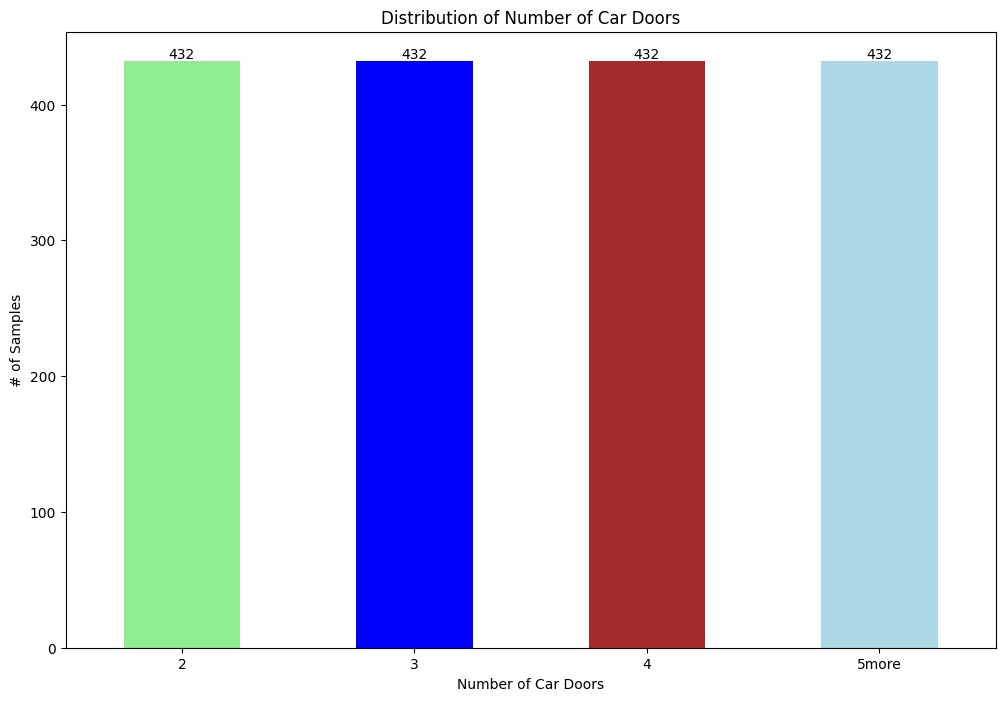

In [10]:
barplot_visual(data["num_of_doors"],
               "Distribution of Number of Car Doors",
               "Number of Car Doors",
               "# of Samples",
               )

#### Dataset Visualization: Seating Capacity

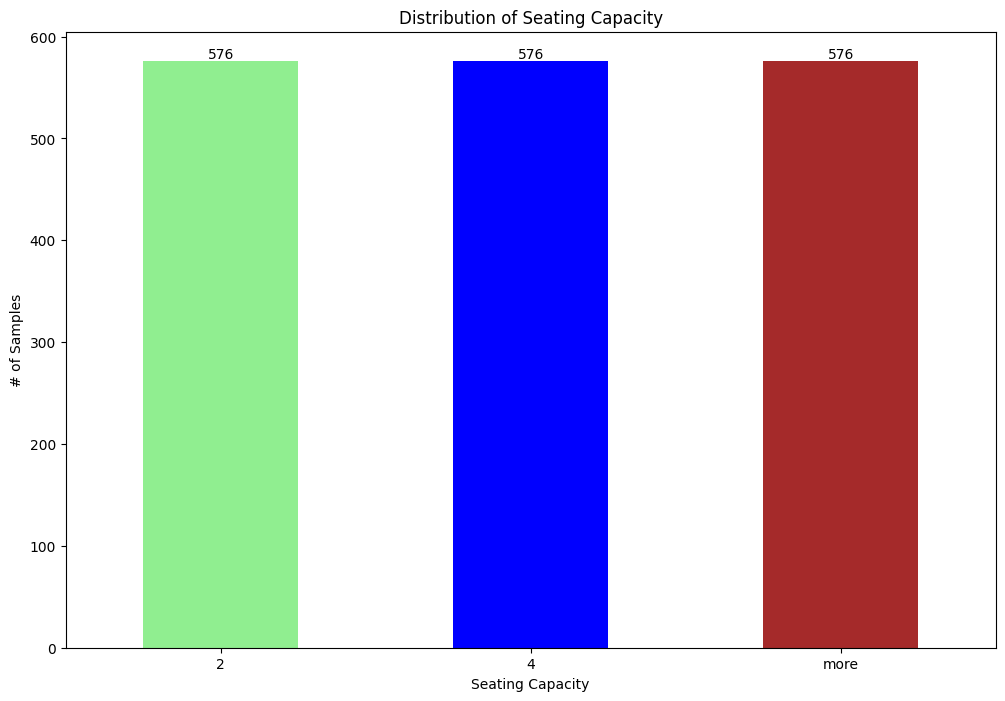

In [11]:
barplot_visual(data["seating_capacity"],
               "Distribution of Seating Capacity",
               "Seating Capacity",
               "# of Samples",
               )

#### Dataset Visualization: Luggage Space

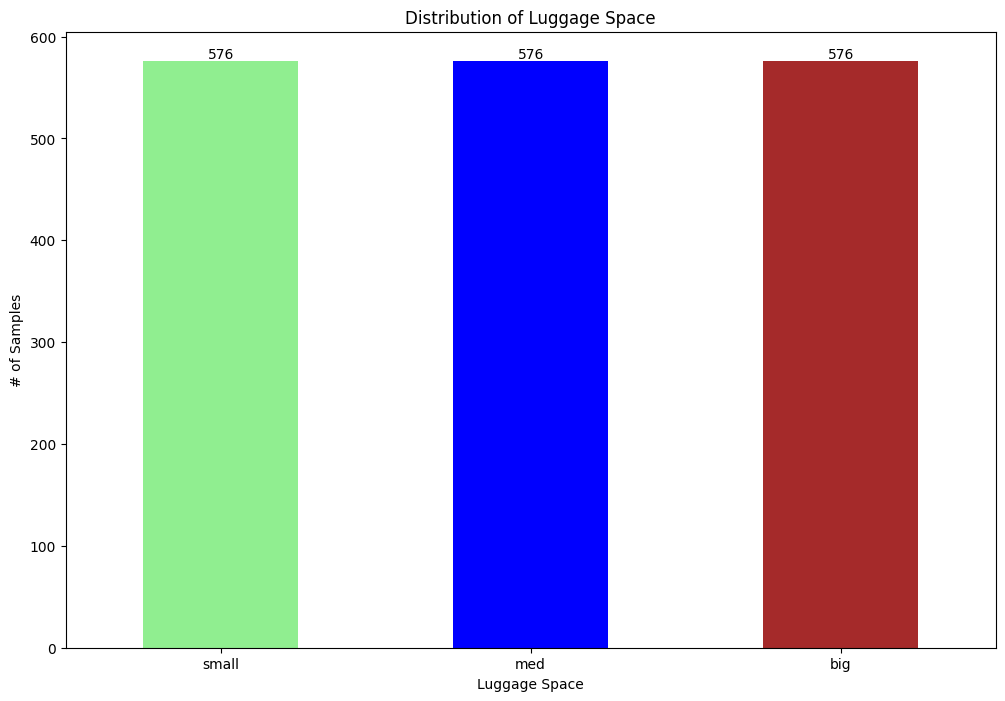

In [12]:
barplot_visual(data["luggage_space"],
               "Distribution of Luggage Space",
               "Luggage Space",
               "# of Samples",
               )

#### Dataset Visualization: Safety Level

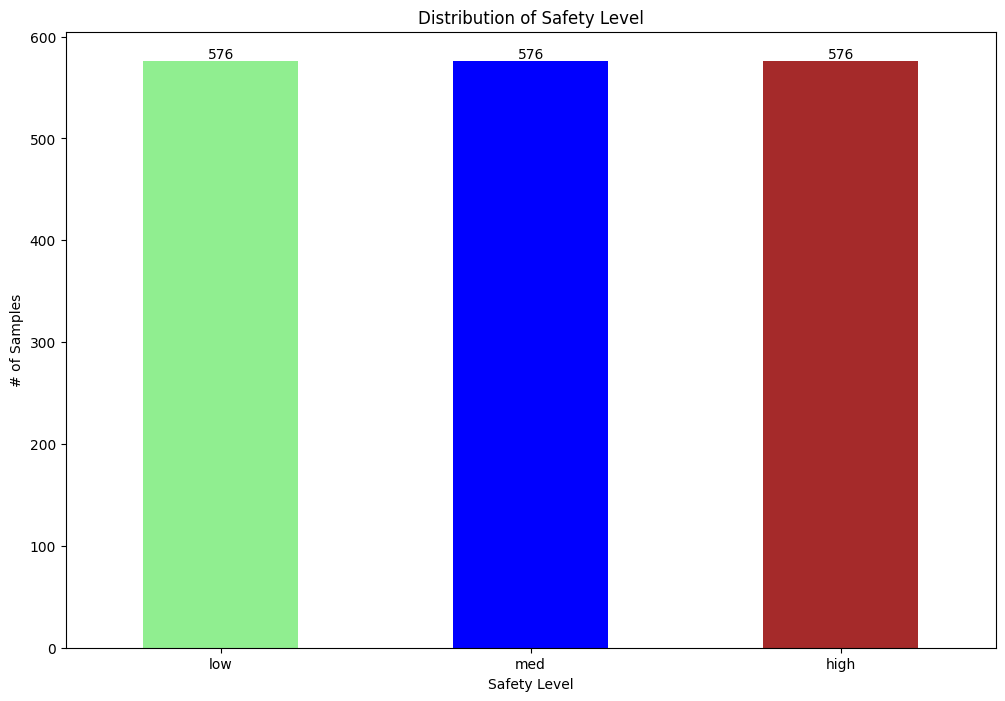

In [13]:
barplot_visual(data["safety"],
               "Distribution of Safety Level",
               "Safety Level",
               "# of Samples",
               )

#### Dataset Visualization: Class Distribution (Car Acceptability)

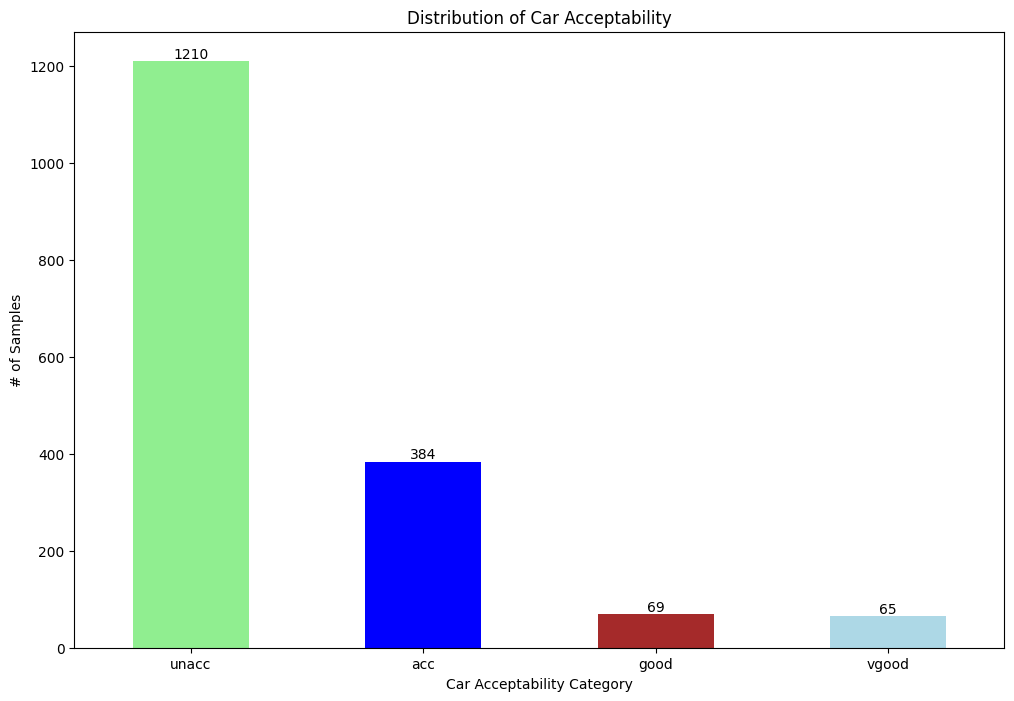

In [14]:
barplot_visual(data["label"],
               "Distribution of Car Acceptability",
               "Car Acceptability Category",
               "# of Samples",
               )

#### Convert String Values to Integers for Correlation Matrix

In [15]:
#luggage_space, safety, label

purchase_price_converter = {"low": 0,
                            "med": 1,
                            "high": 2,
                            "vhigh": 3}

maintenance_price_converter = {"low": 0,
                            "med": 1,
                            "high": 2,
                            "vhigh": 3}

luggage_space_converter = {"small": 0,
                           "med": 1,
                           "big": 2}

safety_converter = {"low": 0,
                    "med": 1,
                    "high": 2}

label_converter = {"unacc": 0,
                   "acc": 1,
                   "good": 2,
                   "vgood": 3}

corr_data = pd.DataFrame()

corr_data['purchase_price'] = data['purchase_price']\
    .replace(purchase_price_converter)\
    .astype(np.int8)
corr_data['maintenance_price'] = data['maintenance_price']\
    .replace(maintenance_price_converter)\
    .astype(np.int8)
corr_data['luggage_space'] = data['luggage_space']\
    .replace(luggage_space_converter)\
    .astype(np.int8)
corr_data['safety'] = data['safety']\
    .replace(safety_converter)\
    .astype(np.int8)
corr_data['label'] = data['label']\
    .replace(label_converter)\
    .astype(np.int8)

# Just change the "5more" to 5 & convert
# to integer for 'num_of_doors'
corr_data['num_of_doors'] = data['num_of_doors']\
    .replace({"5more": 5})\
    .astype(np.int8)

# for seating_capacity, just change 'more' to 5
# & convert to integer
corr_data['seating_capacity'] = data['seating_capacity']\
    .replace({"more": 5})\
    .astype(np.int8)

corr_data

,purchase_price,maintenance_price,luggage_space,safety,label,num_of_doors,seating_capacity
0,3,3,0,0,0,2,2
1,3,3,0,1,0,2,2
2,3,3,0,2,0,2,2
3,3,3,1,0,0,2,2
4,3,3,1,1,0,2,2
...,...,...,...,...,...,...,...
1723,0,0,1,1,2,5,5
1724,0,0,1,2,3,5,5
1725,0,0,2,0,0,5,5
1726,0,0,2,1,2,5,5


#### Correlation Matrix

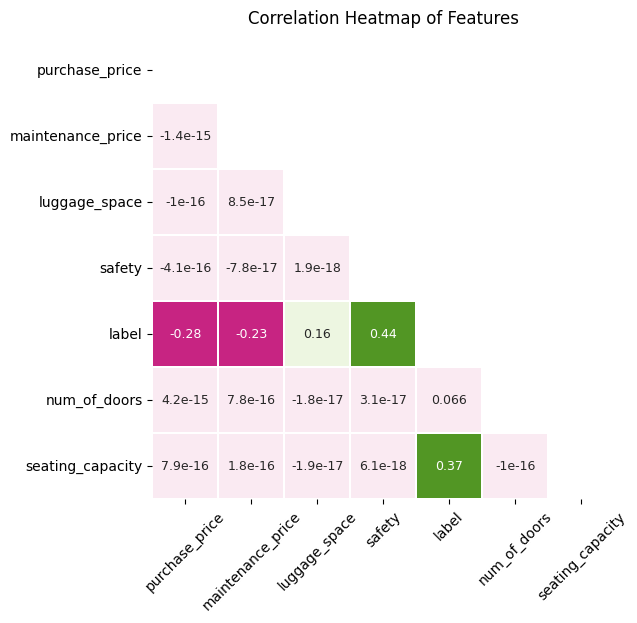

In [16]:
plt.figure(figsize=(6, 6))

lower_triangle = np.triu(corr_data.corr())

corr_matrix = sns.heatmap(corr_data.corr(),
                          annot=True,
                          cmap=sns.color_palette("PiYG", 8),
                          mask=lower_triangle,
                          square=True,
                          linewidths=0.25,
                          cbar=False,
                          annot_kws={"size":9})

corr_matrix.set_title("Correlation Heatmap of Features",
                      pad=10)

corr_matrix.set_xticklabels(corr_matrix.get_xticklabels(),
                            rotation=45)
plt.show()

#### Convert Label Values From String to Integer

In [17]:
label_converter = {"unacc": 0,
                   "acc": 1,
                   "good": 2,
                   "vgood": 3}

data['label'] = data['label']\
    .replace(label_converter)\
    .astype(np.int8)

### Exploratory Data Analysis & Preprocessing

#### Descriptive Statistics

In [18]:
data.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.99], include='all')

,purchase_price,maintenance_price,num_of_doors,seating_capacity,luggage_space,safety,label
count,1728,1728,1728,1728,1728,1728,1728.000000
unique,4,4,4,3,3,3,NaN
top,vhigh,vhigh,2,2,small,low,NaN
freq,432,432,432,576,576,576,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.414931
std,NaN,NaN,NaN,NaN,NaN,NaN,0.740700
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
10%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Prepare Shared Pipeline Data & Stages/Steps

#### Split Dataset into Training & Testing Datasets

In [19]:
y = data['label']
X = data.drop(columns=['label'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f"Training Input Dataset Shape: {X_train.shape}")
print(f"Training Output Dataset Shape: {y_train.shape}")

print(f"Evaluation Input Dataset Shape: {X_test.shape}")
print(f"Evaluation Output Dataset Shape: {y_test.shape}")

Training Input Dataset Shape: (1296, 6)
Training Output Dataset Shape: (1296,)
Evaluation Input Dataset Shape: (432, 6)
Evaluation Output Dataset Shape: (432,)


#### Define Column Lists for Transformers (Pipeline Stages) & Transform to Integer Values

In [20]:
ord_features = ["safety"]

nom_features = [x for x in data.columns.unique() if (x != "label" and x not in ord_features)]

label_class = ['label']

#### Create Column Transformer

In [21]:
encoder_col_transformer = ColumnTransformer(
    [
        (
            'ord_encoder',
            OrdinalEncoder(handle_unknown='use_encoded_value',
                           unknown_value=-1,
                           dtype=np.float64),
            ord_features
            ),
        (
            'ohe',
            OneHotEncoder(handle_unknown='ignore',
                          dtype=np.float64),
            nom_features
        )
    ],
    remainder='passthrough')

#### Metrics Evaluation Method

In [22]:
def metrics_evaluation(classifier_type,
                       y_test,
                       y_pred_cv):


    print("+-------------------------------------------------------------------------+")
    print("|  " + ("Confusion Matrix for " + classifier_type).center(69) + "  |")
    print("+-------------------------------------------------------------------------+")

    cm = confusion_matrix(y_test,
                          y_pred_cv)

    display_cm = ConfusionMatrixDisplay(cm,
                                        display_labels=[
                                            "Unacceptable",
                                            "Acceptable",
                                            "Good",
                                            "Very Good"
                                            ]
                                        )

    display_cm.plot()
    plt.show()

    print("+-----------------------------------------------------+")
    print("|  " + ("Classification Report for " + classifier_type).center(49) + "  |")
    print("+-----------------------------------------------------+")

    print(classification_report(y_test,
                                y_pred_cv,
                                zero_division=0,
                                target_names=[
                                    "Unacceptable",
                                    "Acceptable",
                                    "Good",
                                    "Very Good"
                                    ]
                                )
          )

### Auto-Sklearn

#### Define Pipeline

In [23]:
def auto_sklearn_classifier():
    """
    This function finds optimal
    classifier and parameters.
    """
    auto_sklearn_pipe = Pipeline(
        [
            (
                'encoder_column_transformer',
                encoder_col_transformer
            ),
            (
                'smote',
                SMOTE(random_state=42,
                      sampling_strategy='all')
            ),
            (
                "scaler",
                StandardScaler()
            ),
            (
                'auto_sklearn_clf',
                ASC()
             ),
        ]
    )

    return auto_sklearn_pipe

#### Define Model

In [24]:
auto_sklearn_clf = auto_sklearn_classifier()

auto_sklearn_clf.named_steps

{'encoder_column_transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('ord_encoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  ['safety']),
                                 ('ohe', OneHotEncoder(handle_unknown='ignore'),
                                  ['purchase_price', 'maintenance_price',
                                   'num_of_doors', 'seating_capacity',
                                   'luggage_space'])]),
 'smote': SMOTE(random_state=42, sampling_strategy='all'),
 'scaler': StandardScaler(),
 'random_forest': AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>)}

#### Fit Dataset to Auto-Sklearn Classifier

In [25]:
auto_sklearn_clf_model = auto_sklearn_clf.fit(X_train, y_train)

#### Generate Predictions

In [27]:
predictions = auto_sklearn_clf_model.predict(X_test)

#### Metrics Evaluation

+-------------------------------------------------------------------------+
|           Confusion Matrix for Auto-Sklearn Library Classifier          |
+-------------------------------------------------------------------------+


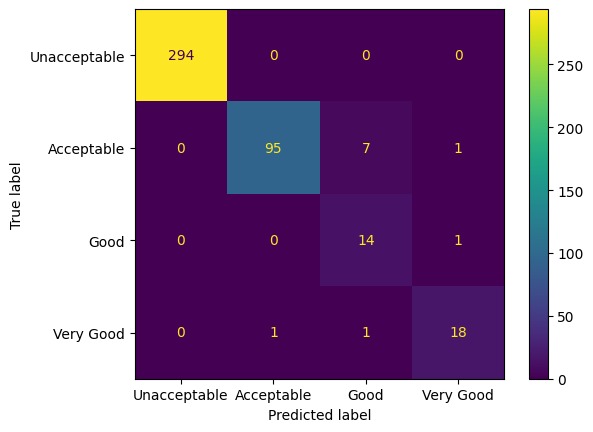

+-----------------------------------------------------+
|  Classification Report for Auto-Sklearn Library Classifier  |
+-----------------------------------------------------+
              precision    recall  f1-score   support

Unacceptable       1.00      1.00      1.00       294
  Acceptable       0.99      0.92      0.95       103
        Good       0.64      0.93      0.76        15
   Very Good       0.90      0.90      0.90        20

    accuracy                           0.97       432
   macro avg       0.88      0.94      0.90       432
weighted avg       0.98      0.97      0.98       432



In [28]:
metrics_evaluation("Auto-Sklearn Library Classifier",
                       y_test,
                       predictions)

### Notes & Other Takeaways From This Project
****
- Wow, these results are pretty good!
- A macro-averaged Fl score of 0.90 is excellent, especially for an imbalanced dataset of this size.
****

### Citations

- Auto-Sklearn
    > @inproceedings{feurer-neurips15a,
    title     = {Efficient and Robust Automated Machine Learning},
    author    = {Feurer, Matthias and Klein, Aaron and Eggensperger, Katharina and Springenberg, Jost and Blum, Manuel and Hutter, Frank},
    booktitle = {Advances in Neural Information Processing Systems 28 (2015)},
    pages     = {2962--2970},
    year      = {2015}
}

    > @article{feurer-arxiv20a,
    title     = {Auto-Sklearn 2.0: Hands-free AutoML via Meta-Learning},
    author    = {Feurer, Matthias and Eggensperger, Katharina and Falkner, Stefan and Lindauer, Marius and Hutter, Frank},
    journal   = {arXiv:2007.04074 [cs.LG]},
    year      = {2020},
}